In [1]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

(sec:theory_urn)=
# The Urn Model

The urn model is a simple abstraction of the chance mechanism for drawing indistinguishable marbles from a container, an urn. The randomness in the selection process of drawing marbles from an urn can be extended to many chance processes in real-life examples, and we can simulate this random behavior and use our findings to better understand the accuracy of our data. To explain the urn model, we use a small example with seven marbles. The urn is small enough that we can list all possible outcomes that might result from drawing marbles from the urn.

Let's use the SpaceX Starship prototypes to make up a small example. The protoypyes are called $SN1$, $SN2$, ..., where $SN$ stands for "serial number", and in the first half of 2020, seven of these prototypes were built. Before deploying them a few were pressure tested. Suppose we want to select three of the seven Starship prototypes for pressure testing. (While this example is made up, the context is based on the actual SpaceX program; pressure tests were made on the Starship prototypes, $SN1$, $SN2$, ..., $SN7$.)  

We set up the urn model as follows: write a unique label on each of seven marbles, place all the marbles in the urn, mix them well, and draw three without looking and without replacing marbles between draws. The urn is small enough that we can list all possible samples of three marbles that can be drawn: 

$$ABC ~~ ABD ~~ ABE ~~ ABF ~~ ABG ~~ ACD ~~ ACE \\ ACF ~~ ACG ~~ ADE ~~ ADF ~~ ADG ~~ AEF ~~ AEG \\ AFG ~~ BCD ~~ BCE ~~ BCF ~~ BCG ~~ BDE ~~ BDF \\ BDG ~~ BEF ~~ BEG ~~BFG ~~CDE ~~ CDF ~~ CDG \\ CEF ~~ CEG ~~ CFG ~~ DEF ~~ DEG ~~ DFG ~~ EFG  $$

We use the labels $A$, $B$, etc. rather than $SN1$, $SN2$, etc. because they are shorter and easier to distinguish. Our list shows that we could wind up with any one of the $35$  unique sets of three from the seven marbles.

We draw an analogy to data scope from {numref}'Chapter %s <ch:data_scope>': a set of marbles drawn from the urn is a *sample*, and the collection of all marbles placed in the urn is the *population*.  This particular urn model prescribes a particular selection method, called the *Simple Random Sample (SRS)*. We describe the SRS and other sampling techniques based on the SRS in the next section. 


## Sampling Designs

The urn model for the SpaceX prototypes reduced to a few basics. We specified: the number of marbles in the urn; what is written on each marble; the number of marbles drawn from the urn; whether or not they were replaced between draws. This process is equivalent to a Simple Random Sample. Our example is a SRS of three draws from a population of seven, and by design, each of the $35$ samples is equally likely to be chosen because the marbles are indistinguishable and well mixed. This means the chance of any one particular sample must be $1/35$,

$${\mathbb{P}}(ABC) = {\mathbb{P}}(\textrm{ABD}) = \cdots = {\mathbb{P}}(\textrm{EFG}) = \frac{1}{35}.$$

We use the special symbol ${\mathbb{P}}$ to stand for "probability" or "chance", and we read the statement ${\mathbb{P}}(ABC)$ as the "chance the sample contains the marbles labeled A, B, and C."

We now have a more formal definition of "representative data" that is very useful:
__In a *Simple Random Sample*, every sample has the same chance of being selected.__

:::{note}

Many people mistakingly think that the defining property of a SRS is that every unit has an equal chance of being in the sample. However, this is not the case. A SRS of $n$ units from a population of $N$ means that every possible subset of $n$ units has the same chance of being selected.

:::

We can use the enumeration of all of the possible samples from the urn to answer additional questions about this chance process. For example, to find the chance that marble $A$ is in the sample, we can add up the chance of all samples that contain $A$. There are 15 of them so the chance is:

$${\mathbb{P}}(\textrm{A is in the sample}) = \frac{15}{35} = \frac{3}{7}.$$

When it's too difficult to list and count all of the possible samples, we can use simulation to help understand this chance process. 

The SRS (and its corresponding urn) is the main building block for more complex survey designs. We briefly describe two of the more widely used designs.

+ *Stratified Sampling* Divide the population into non-overlapping groups, called *strata* (one group is called a *stratum* and more than one are strata), and then take a simple random sample from each.  This is like having a separate urn for each stratum and drawing marbles from each urn, independently. The strata do not have to be the same size, and we need not take the same number of units from each.

+ *Cluster Sampling* Divide the population into non-overlapping subgroups (these tend to be smaller than strata), take a simple random sample of the clusters, and include all of the units in a cluster in the sample. We can think on this as a SRS from one urn that contains large marbles that are themselves containers of small marbles. When opened, the sample of large marbles turns into the sample of small marbles.

Often, we are interested in a summary of the sample; that is, some *statistic*. For any sample, we can calculate the statistic, and the urn model helps us find the distribution of possible values that statistic may take on. In the next section, we examine the distribution of a statistic for our example.

## Sampling Distribution of a Statistic

Suppose we are interested in whether or not the prototypes can pass a pressure test. It's expensive to carry out the pressure test, so we first test only a sample of prototypes. We can use the urn model to choose the protoypes to be pressure tested, and then, we can summarize our test results by, say, the proportion of prototypes that fail the test. The urn model provides us the knowledge that each of the 35 possible samples has the same chance of being selected and so the pressure test results are representative of the population. 

For concreteness, suppose prototypes $A, B, D, and F$ would fail the pressure test, if chosen. For each sample of three marbles, we can find the proportion of failures according to how many of these four defective prototypes are in the sample. Below are a few examples of this calculation.

|    |    |    |    |    |   
| :---        | :----   |  :--- | :--- |  :--- |   
| Sample      | ABC       | BCE   | BDF | CEG | 
| Proportion  | 2/3       | 1/3   | 1   | 0   | 

Since we are drawing three marbles from the urn, the only possible samples proportions are  $0$, $1/3$, $2/3$ and $1$, and for each triple, we can calculate its corresponding proprotion.  For example, there are 4 samples that give us all failed tests (a sample proportion of 1). These are: $ABD$ , $ABF$, $ADF$, $BDF$, so the chance of observing a sample proportion of $1$ is $4/35$. Below we have summarized the distribution of values for the sample proportion into a table.

| Proportion of Fails | No. of Samples | Fraction of Samples |
| :---: | :---: | :---: |
| 1 | 4 | 4/35 |
| 2/3 | 18 | 18/35 |
|1/3 | 12 | 12/35 |
| 0 | 1 | 1/35 |
|Total | 35 | 1 |

While these calculations are relatively straight forward, we can approximate them through a simulation study. To do this, we take samples of three from our population over and over, say 10,000 times.  For each sample, we calculate the proportion of failures. That gives us 10,000 simulated sample proportions. 
The table of the simulated proportions should match the distribution table above. We confirm this with a simulation study. 

## Simulating the Sampling Distribution

Our original urn had seven marbles marked $A$ through $G$. However, since we care only whether the prototype fails or passes the test, we can re-label each marble as 'fail' or 'pass'.  We create this revised urn as an array. 

In [2]:
urn = ['fail', 'fail', 'fail', 'fail', 'pass', 'pass', 'pass']

We simulate the draw of three marbles from our urn without replacement between draws using numpy's 'random.choice' method as follows. 

In [3]:
np.random.choice(urn, size=3, replace=False)

array(['fail', 'pass', 'fail'], dtype='<U4')

Let's take a few more sample from our urn to see what the results might look like.

In [4]:
[np.random.choice(urn, size = 3, replace = False) for i in range(10)] 

[array(['pass', 'pass', 'fail'], dtype='<U4'),
 array(['pass', 'fail', 'pass'], dtype='<U4'),
 array(['fail', 'pass', 'fail'], dtype='<U4'),
 array(['fail', 'pass', 'fail'], dtype='<U4'),
 array(['fail', 'fail', 'fail'], dtype='<U4'),
 array(['pass', 'fail', 'pass'], dtype='<U4'),
 array(['fail', 'pass', 'fail'], dtype='<U4'),
 array(['pass', 'fail', 'fail'], dtype='<U4'),
 array(['pass', 'fail', 'pass'], dtype='<U4'),
 array(['pass', 'pass', 'fail'], dtype='<U4')]

Since we simply want to count the number of failures in the sample, it's easier if the marbles are labeled 1 for fail and 0 for pass. This way, we can sum the results of the three draws to get the number of failures in the sample. We re-label the marbles in the urn again, and compute the fraction of fails in a sample.

In [5]:
urn = [1, 1, 1, 1, 0, 0, 0]
sum(np.random.choice(urn, size=3, replace=False))/3

0.6666666666666666

We have stream-lined the process and we're now ready to carry out the simulation study. Let's repeat the process 100,000 times.

In [6]:
simulations = [sum(np.random.choice(urn, size=3, replace=False)) / 3
               for i in range(10000)] 

We can study these 100,000 sample proportions and match our findings against what we calculated already using the  table based on the enumeration of all 35 possible samples. We expect the simulation results to be close to our earlier calculations because we have repeated the sampling process many many times. That is, we want to compare the fraction of the 100,000 sample proportion that are $0$, $1/3$, $2/3$, and $1$ to those in the table. These fractions should be, approximately, $1/35$, $12/35$, $18/35$, and $4/35$, or about  $0.03$, $0.34$, $0.51$, and $0.11$.

In [7]:
unique_els, counts_els = np.unique(np.array(simulations), return_counts=True)

In [8]:
np.array((unique_els, counts_els/10000))

array([[0.  , 0.33, 0.67, 1.  ],
       [0.03, 0.35, 0.51, 0.11]])

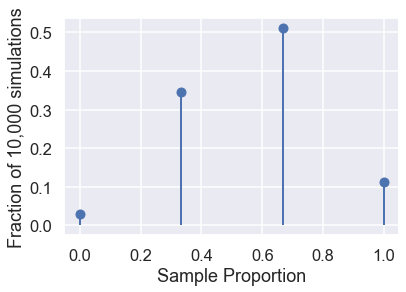

In [9]:
fracs = counts_els/10000

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(unique_els, fracs, 'bo')
ax.vlines(unique_els, 0, fracs, lw=2)
ax.set_xlabel('Sample Proportion')
ax.set_ylabel('Fraction of 10,000 simulations')
plt.show()

The simulation results closely match the table. 

This simulation study does not *prove*, say, that we expect 18/35 samples to have two fails, but it does give us excellent approximations to our earlier calculations, which is reassuring. More importantly, when we have a more complex setting where it might be difficult to list all possibilities, a simulation study can offer valuable insights. 

:::{note}

A simulation study repeats a random process many many times.  A summary of the patterns that result from the simulation can approximate the theoretical properties of the chance process. This summary is not the same as proving the theoretical properties, but often the guidance we get from the simulation is adequate for our purposes.

:::

Drawing marbles from an urn with 0s and 1s is such a popular framework for understanding randomness that this chance process has been given a formal name, the hypergeometric. And, most software provide the functionality to rapidly carry out simulations of the hypergeomteric. We redo our simulation using the hypergeometric to complete this section.     

## The Hypergeometric

The version of the urn model where we count the number of marbles of a certain type (in our case 'fail' marbles) is so common that there is a random chance process named for it: the hypergeometric. 
Instead of using `random.choice`, we can use numpy's `random.hypergeometric` to simulate drawing marbles from the urn and counting the number of `fails`. The `random.hypergeometric` method is optimzed for the 0-1 urn and allows us to ask for 10,000 simulations in one call. For completeness, we repeat our simulation study and calculate the empirical proportions.  

In [10]:
simulations_fast = np.random.hypergeometric(ngood=4, nbad=3, nsample=3, size=10000)

Note: we don't think that a pass is "bad"; it's just a naming convention to call the type you want to count "good" and the other "bad". 

In [11]:
unique_els, counts_els = np.unique(np.array( simulations_fast ), return_counts=True)

In [12]:
np.array((unique_els, counts_els/10000))

array([[0.  , 1.  , 2.  , 3.  ],
       [0.03, 0.34, 0.52, 0.11]])

You might have asked yourself already - since the hypergeometric is so popular, why not provide the exact distribution of the possible values. In fact, these are available, and we show how to calculate them below.    

In [13]:
from scipy.stats import hypergeom

x = np.arange(0, 4)
hypergeom.pmf(x, 7, 4, 3)

array([0.03, 0.34, 0.51, 0.11])

Perhaps the two most common chance processes are those that arise from counting the number of 1s drawn from a 0-1 urn: drawing without replacement is the *hypergeometric* and drawing with replacement is the *binomial*.

:::{note}

Whenever possible, it's a good idea to use the functionality provided in a third party package for simulating from a named distribution, rather than writing your own function, such as the random number generators offered in numpy. It's best to take advanatge of efficient and accurate code that others have  devloped.

:::

While this simulation was simple, so simple that we could have used `hypergeom.pmf` to complete our distribution, we wanted to demonstrate the intuition that a simulation study can reveal.  The approach we take in this book is to develop understanding about chance processes based on simulation studies. However, we do formalize the notion of a probability distribution of a statistics (like the proportion of fails in a sample) in
{numref}`Section %s <sec:theory_probability>`. 

Now that we have simulation as a tool for understanding accuracy, we can revisit the election example from {numref}`Chapter %s <ch:data_scope>` and carry out a post-election study of what might have gone wrong with the voter polls. This simulation study imitates drawing more than a thousand marbles (voters who participate in the poll) from an urn of six million. We can examine potential sources of bias and the variation in the polling results, and carry out a what-if analysis, where we examine how the predictions might have gone if even a larger number of draws from the urn were taken.    